In [1]:
# notebook import

from ipynb.fs.full.data_processing import *

In [2]:
# user input parameters

# boolean parameter to dictate whether code is run
run = False

# boolean parameter to dictate use of print statements
debug = False

# boolean parameter to dictate whether results are written to .csv files
write = False

# list of binning methods used to find the range over which numbers of bins are tested for entropy-based bin selection
methods = ['fd', 'doane', 'scott', 'stone', 'rice', 'sturges', 'sqrt']

In [3]:
# function declaration

# input: dictionary mapping a given feature to its optimal bin edge configuration (feature_bin_dict) and a feature of interest (feature)
# output: None (writes optimal number of bins and bin configuration of specified feature to .csv file)
def write_csv_optimal_bins(feature_bin_dict, feature):
    csv_fpath = results_fpath + bin_selection_ext + f'{feature}_optimal_bins.csv'
    append_row_csv(csv_fpath, ['n_bins', 'bin_edges'])
    append_row_csv(csv_fpath, [len(feature_bin_dict[feature]), feature_bin_dict[feature]])
    return

# input: list of number of bins (bin_range), a list of their corresponding entropies (entropies), and a feature of interest (feature)
# output: None (writes each number of bins its corresponding entropy to .csv file)
def write_csv_bin_entropies(bin_range, entropies, feature):
    csv_fpath = results_fpath + bin_selection_ext + f'{feature}_bin_entropies.csv'
    append_row_csv(csv_fpath, ['entropy', 'n_range'])
    for (e, n) in zip(entropies, bin_range):
        append_row_csv(csv_fpath, [e, n])
    return

# input: dictionary mapping a binning method to (the number of bins it produces, the corresponding entropy) (method_dict)
# output: None (writes each method, its number of bins, and its corresponding entropy to .csv file)
def write_csv_bin_entropies_methods(method_dict, feature):
    csv_fpath = results_fpath + bin_selection_ext + f'{feature}_bin_entropies_methods.csv'
    append_row_csv(csv_fpath, ['method',  'n_bins', 'entropy'])
    for method in method_dict:
        append_row_csv(csv_fpath, [method,  method_dict[method][0], method_dict[method][1]])
    return

# input: a series of measurements (series) corresponding to a feature of interest (feature)
# output: dictionary mapping a binning method to (the number of bins it produces, the corresponding entropy), and a list of bin numbers for calculating entropy
def create_method_dict(series, feature):
    method_dict = {}
    method_bins = []
    for method in methods:
        hist, bin_edges = np.histogram(series, bins=method, density=False)
        probabilities = hist / len(series)
        probabilities = probabilities[probabilities > 0] 
        shannon_entropy = entropy(probabilities)
        n_bins = len(bin_edges) - 1
        method_dict[method] = (n_bins, shannon_entropy)
        method_bins.append(n_bins)
    bin_range = []
    for i in range(min(method_bins), max(method_bins)+1):
        if i % 10 == 0:
            bin_range.append(i)
    return method_dict, bin_range

# input: a list of bin numbers for calculating entropy (bin_range) and a series of measurements (series)
# output: list of entropies for the series of measurements calculated with each given configuration of bins
def find_entropies(bin_range, series):
    entropies = []
    for n in bin_range:
        (hist, bin_edges, _) = plt.hist(series, bins=n, density=True)
        probabilities = hist / len(series)
        probabilities = probabilities[probabilities > 0]
        shannon_entropy = entropy(probabilities)
        entropies.append(shannon_entropy)
    return entropies

# input: list of bin numbers (bin_range) and their corresponding entropies (entropies)
# output: the optimal number of bins, calculated by finding the knee point in the plot of entropies
def find_optimal_bins(bin_range, entropies):
    knee_locator = KneeLocator(bin_range, entropies, curve="concave", direction="increasing")
    optimal_bins = knee_locator.knee
    return optimal_bins

In [4]:
# `main()` function declaration

# intended use in coordination with `bin_selection_plot.ipynb`
# requires: import of `data_processing.ipynb` and user input parameters specified above
# output: None (assigns new global variable `feature_bin_dict` and writes to output .csv files)

def main():
    
    # dictionary mapping each feature to its optimal bin edge configuration
    global feature_bin_dict
    feature_bin_dict = {}
    
    for feature in feature_name_list:
        
        # series of measurements for given feature
        feature_series = feature_df[feature]
        
        # find the range of number of bins suggested by binning methods (a range for entropy-based bin selection)
        method_dict, bin_range = create_method_dict(feature_series, feature)
    
        # find the entropy of the series of measurements using each number of bins in the specified range
        entropies = find_entropies(bin_range, feature_series)
        
        # find the optimal number of bins (the knee point of the entropy calculations)
        optimal_bins = find_optimal_bins(bin_range, entropies)
        
        # calculate the feature's bin edge configuration given the optimal number of bins
        bin_edges = np.linspace(min(feature_series), max(feature_series), optimal_bins+1)
        
        # assign feature to its bin edge configuration
        feature_bin_dict[feature] = bin_edges
        
        if write:
            
            # write to .csv files
            write_csv_optimal_bins(feature_bin_dict, feature)
            write_csv_bin_entropies(bin_range, entropies, feature)
            write_csv_bin_entropies_methods(method_dict, feature)
            
    if debug:
        print('feature_bin_dict:', type(feature_bin_dict), '\n', feature_bin_dict)
        
    return

/Users/sarahfisher/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:793: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


feature_bin_dict: <class 'dict'> 
 {'gfp': array([ 226.76648352,  231.52971492,  236.29294632,  241.05617772,
        245.81940912,  250.58264052,  255.34587192,  260.10910333,
        264.87233473,  269.63556613,  274.39879753,  279.16202893,
        283.92526033,  288.68849173,  293.45172313,  298.21495454,
        302.97818594,  307.74141734,  312.50464874,  317.26788014,
        322.03111154,  326.79434294,  331.55757434,  336.32080574,
        341.08403715,  345.84726855,  350.61049995,  355.37373135,
        360.13696275,  364.90019415,  369.66342555,  374.42665695,
        379.18988836,  383.95311976,  388.71635116,  393.47958256,
        398.24281396,  403.00604536,  407.76927676,  412.53250816,
        417.29573957,  422.05897097,  426.82220237,  431.58543377,
        436.34866517,  441.11189657,  445.87512797,  450.63835937,
        455.40159078,  460.16482218,  464.92805358,  469.69128498,
        474.45451638,  479.21774778,  483.98097918,  488.74421058,
        493.5074419

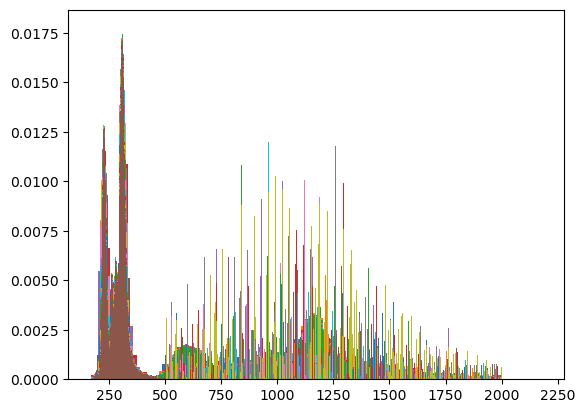

In [5]:
# call to `main()` function

if run:
    main()